# A - Gerar o seguinte sinal:
S = sin(2.f1.t) + sin(2.f2.t) + sin(2.f3.t), sampling frequency 8kHz, gere 6 s de sinal,
onde:
f1 = 750 Hz;
f2 = 2500 Hz;
f3 = 3250 Hz

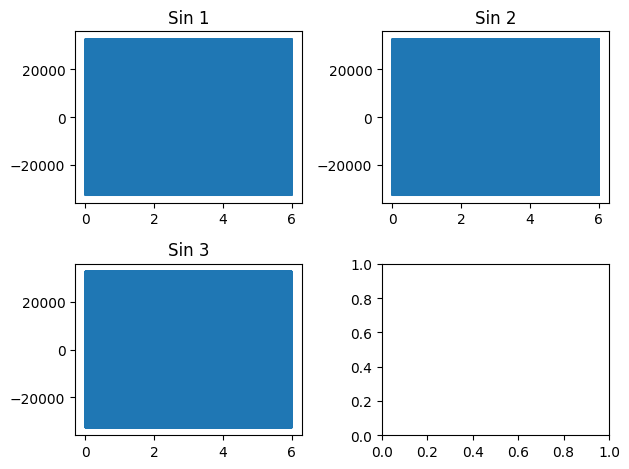

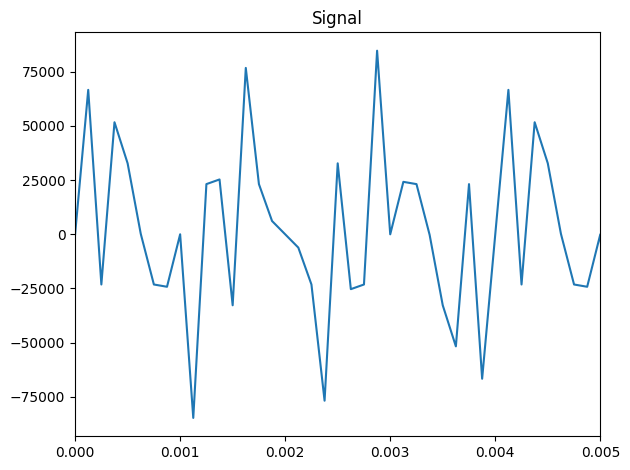

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


def normalise(x,MAX_INT16=32767):
    maxamp = max(x)
    amp = math.floor(MAX_INT16/maxamp)
    norm = np.zeros(len(x))
    for i in range(len(x)):
        norm[i] = amp*x[i]
    return norm


def genSine(a, freq, duration, sample_rate):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    sinusoid = a*np.sin(2*np.pi*t*freq)
    sinusoid = normalise(sinusoid)
    return sinusoid

fs = 8000
dur = 6
N = 6*fs # Number of samples
t = np.linspace(0, dur, fs * dur, endpoint=False)
sin1 = genSine(1,750,dur, fs)
sin2 = genSine(1,2500,dur,fs)
sin3 = genSine(1,3250,dur,fs)
signal = sin1 + sin2 + sin3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(t, sin1)
ax1.set_title('Sin 1')
ax2.plot(t, sin2)
ax2.set_title('Sin 2')
ax3.plot(t, sin3)
ax3.set_title('Sin 3')
plt.tight_layout()

fig, ax = plt.subplots()
ax.plot(t, signal)
ax.set_title('Signal')
ax.set_xlim(0, 0.005)
plt.tight_layout()

# B - Calcule o espectro de frequências de S

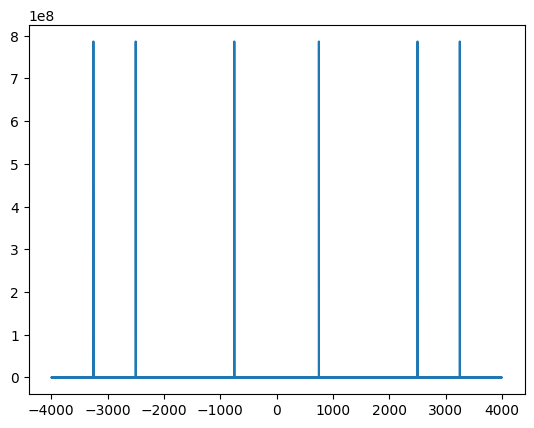

In [2]:
from scipy.fft import fft, fftfreq

yf = fft(signal)
xf = fftfreq(N, 1 / fs)

plt.plot(xf, np.abs(yf))

# C - Filtre o sinal S utilizando o filtro projetado, mostrando a saída do filtro e o espectro de frequências do sinal filtrado

In [6]:
from numpy.core.umath import (
    pi, cos, sin,
    ) 

def window_hamming_low_pass(signal, passband_edge_frequency, transition_width, sampling_frequency, duration):
    delta_f = transition_width / sampling_frequency
    M = sampling_frequency * duration
    N = round(3.3/delta_f)
    n = round((N-1)/2) + 1
    h_d = np.zeros(n)
    w = np.zeros(n)
    h = np.zeros(n)
    fc_norm = (passband_edge_frequency + transition_width/2) / sampling_frequency

    # Calculating the low pass filter kernel
    for i in range(0, n):
        if i == 0:
            h_d = 2 * fc_norm
            w =  0.54 + 0.46*cos(2*pi*i/(N))
        else:
            h_d = 2 * fc_norm * sin(2*pi*i*fc_norm)/(2*pi*i*fc_norm)
            w =  0.54 + 0.46*cos(2*pi*i/(N))
        h[i] =  h_d * w
    
    # To make the causal filter
    h_list = h.tolist()
    h_rev = h.tolist()
    h_rev.reverse()
    h_rev.extend(h_list[1:])
    kernel = h_rev
    
    # Convolve the input signal and filter the kernel
    y = np.zeros(M)
    for j in range(N, M):
        for i in range(0, N):
            y[j] += signal[j-i]*kernel[i]
    return y

53
27


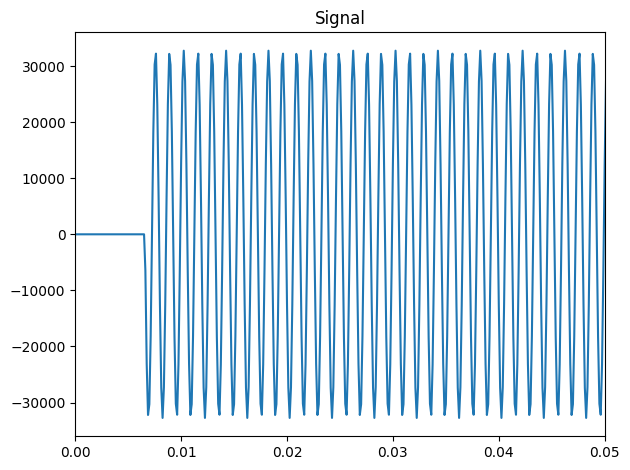

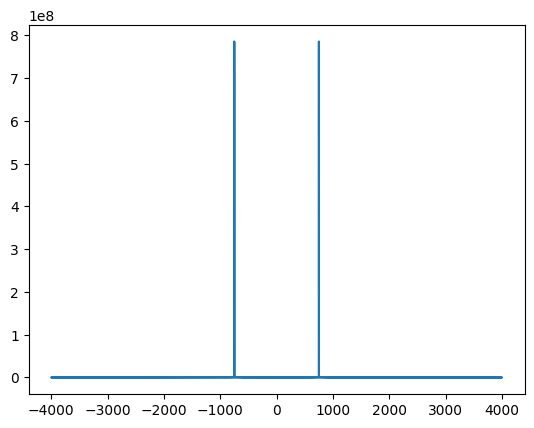

In [4]:
signal_filter = window_hamming_low_pass(signal, 1500, 500, 8000, 6)

fig, ax = plt.subplots()
ax.plot(t, signal_filter)
ax.set_title('Signal')
ax.set_xlim(0, 0.05)
plt.tight_layout()

fig, ax = plt.subplots()
yf_filter = fft(signal_filter)
xf_filter = fftfreq(N, 1 / fs)
ax.plot(xf_filter, np.abs(yf_filter))

# D -

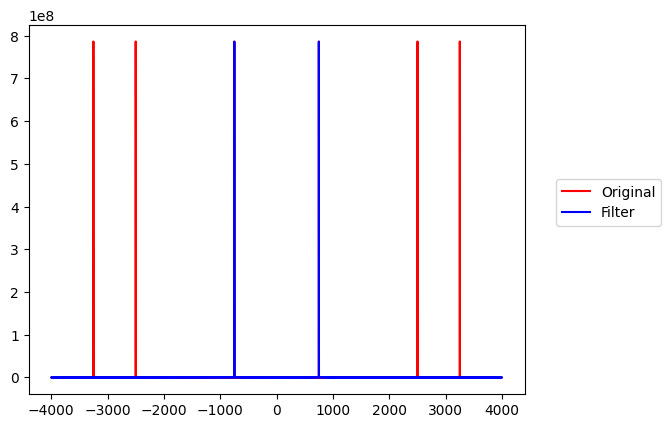

In [5]:
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf), color='red', label='Original')
ax.plot(xf_filter, np.abs(yf_filter), color='blue', label='Filter')
plt.legend(bbox_to_anchor = (1.05, 0.6))